# Using Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing all the libraries
2. Understanding the structure of the data

In [157]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [158]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
hou = pd.read_csv('Housing.csv')
hou.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [160]:
hou.shape

(545, 13)

In [161]:
hou.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [162]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [163]:
hou.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

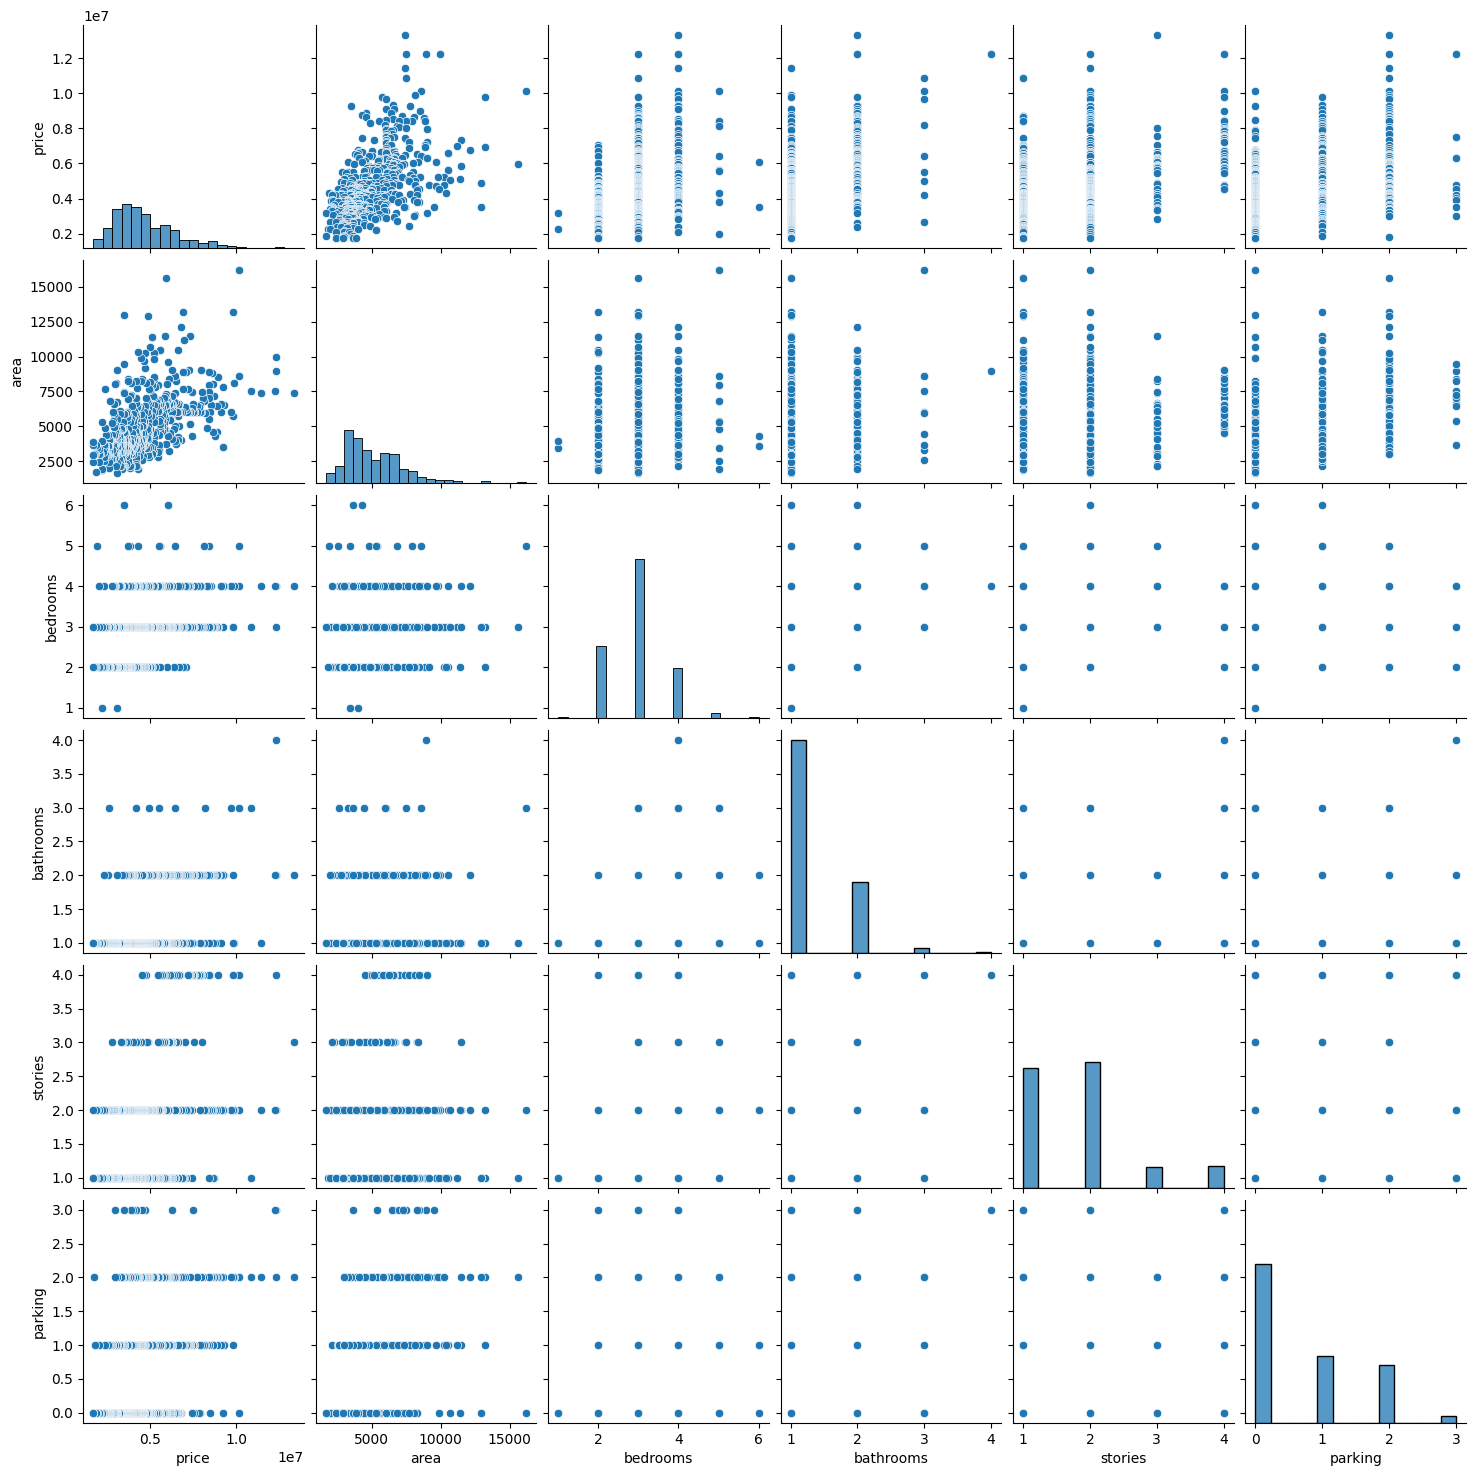

In [164]:
sns.pairplot(hou)
plt.show()

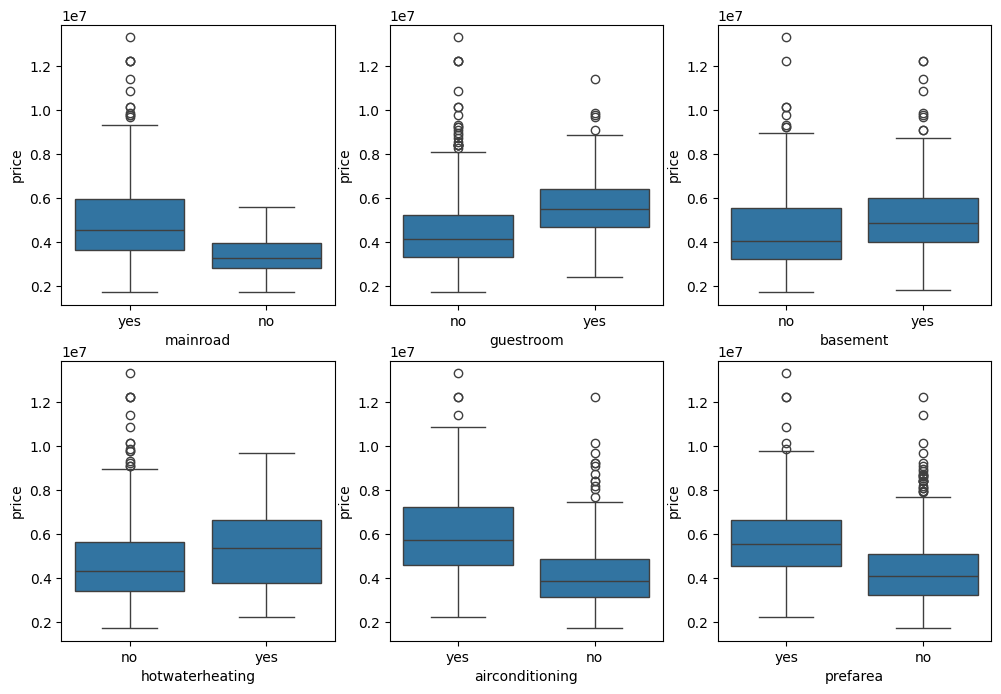

In [165]:
#visualize the categorical variables
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad', y='price', data=hou)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y='price', data=hou)

plt.subplot(2,3,3)
sns.boxplot(x='basement', y='price', data=hou)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=hou)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y='price', data=hou)

plt.subplot(2,3,6)
sns.boxplot(x='prefarea', y='price', data=hou)

plt.show()

## Step 3: Data Preparation

Let's start with the following steps:
1. Convert Binary(No/Yes) Categorical variables to 0/1.
- You can see that your dataset has many columns with values as 'Yes' or 'No'.
- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.
2. Create Dummy variables to other Categorical variables.
- The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`
3. Splitting data into train and test sets.
4. Rescaling of data

In [166]:
#Need to segregate the categorical columns(yes/no) from main dataframe and add to a list.
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
hou[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [167]:
# Defining the map function yes --> 1 and no --> 0
hou[varlist] = hou[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
hou[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [168]:
#Now lets deal with furnishingstatus column as it has 3 different categories
status = pd.get_dummies(hou['furnishingstatus'], dtype = 'int64')
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where —
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [169]:
#Dropping the first column of status dataframe as there should be only n-1 dummy variables.
# i.e.,for 3 categories only 2 dummy variables are to be created.
status.drop(status.columns[0], axis=1, inplace=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [170]:
#Concatenate the housing and status dataframes together
hou = pd.concat([hou, status], axis=1)
hou.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [171]:
#Drop the unnecessary columns from the dataframe like non-numerical columns(here furnishingstatus column).
hou.drop(['furnishingstatus'], axis=1, inplace=True)
hou.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [172]:
import sklearn
from sklearn.model_selection import train_test_split

In [173]:
#Spliting of data into train and test sets.
df_train,df_test = train_test_split(hou,train_size = 0.7,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [174]:
#Rescaling of data

#one method is Normalization
#(x-x.min())/(x.max()-x.min())

#other method is Standardization
#(x-x.mean())/x.std()

In [175]:
from sklearn.preprocessing import MinMaxScaler

In [176]:
#Instatiate the Object
scaler = MinMaxScaler()

In [177]:
#Create a list of numeric variables i.e., other than the categorical variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [178]:
#fit() -- learns xmin, xmax
#transform() -- finds the values of x-xmin/max-xmin
#fit_transform() -- both methods are included

In [179]:
#Fit the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


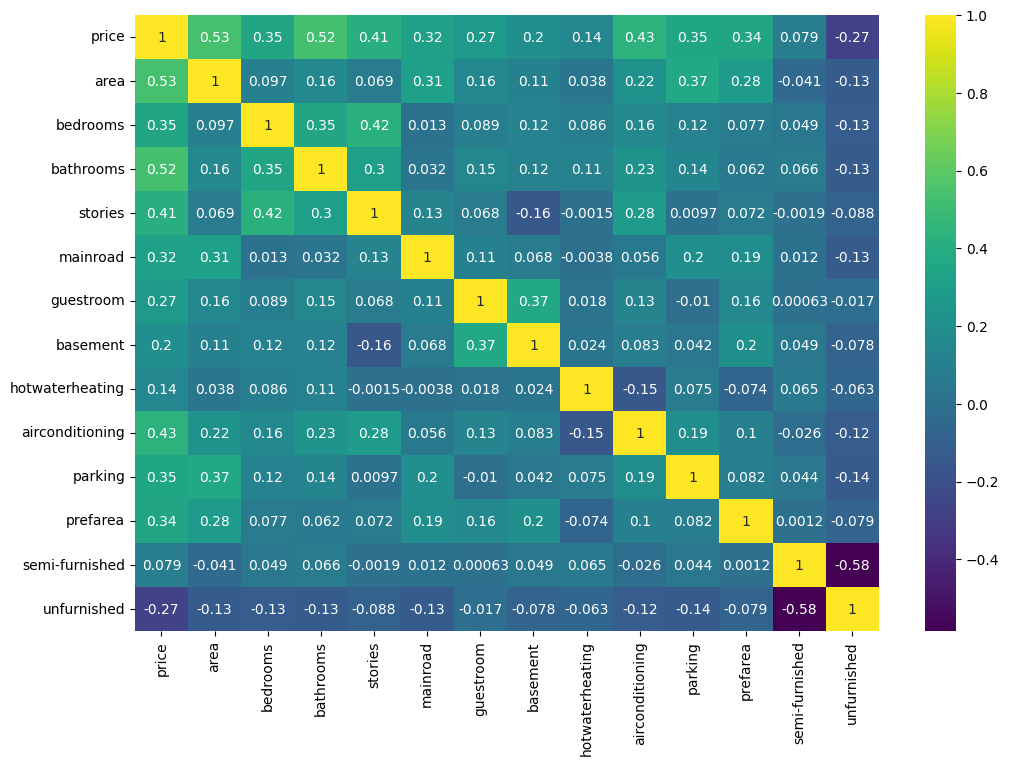

In [180]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), annot=True, cmap='viridis')
plt.show()

## Step 4: Training the model using SKLearn model

We can build the Machine learning model using the statsmodel library.

In [181]:
#X_train,y_train
X_train = df_train.drop(['price'], axis=1)
y_train = df_train['price']

In [182]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [183]:
y_train.head()

,price
359,0.169697
19,0.615152
159,0.321212
35,0.548133
28,0.575758


In [184]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [185]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [186]:
# running RFE
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [187]:
#rfe.support_ -- This shows whether the column is supported or not
#rfe.ranking_ -- This shows the ranking of the columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 5),
 ('basement', False, 7),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 6)]

In [188]:
hou.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [189]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [190]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [191]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [192]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [193]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           6.98e-78
Time:                        07:41:05   Log-Likelihood:                 353.86
No. Observations:                 381   AIC:                            -693.7
Df Residuals:                     374   BIC:                            -666.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0659      0.010     


We can see that the equation of our best fitted line is:

**price=0.3085 × area + 0.2152 × bathrooms + 0.1133 × stories + 0.0774 × airconditioning + 0.0995 × hotwaterheating + 0.0736 × prefarea**

In [194]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.24
5,airconditioning,1.20
2,bathrooms,1.16
3,stories,1.16
1,area,1.15
6,prefarea,1.10
4,hotwaterheating,1.06


## Step 5: Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [195]:
y_train_pred = lm.predict(X_train_rfe)

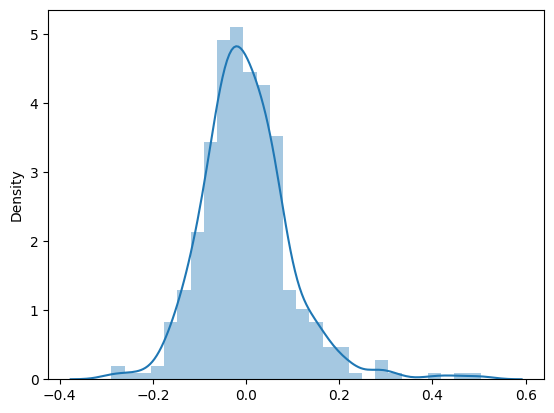

In [196]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

**Inference:**

The above Distribution plot shows that the mean lies at 0 and the residuals are normally distributed.

## Step-6: Predictions and Evaluations on Test set

In [197]:
#Create a list of numeric variables i.e., other than the categorical variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [198]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [199]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
y_test = df_test['price']
X_test = df_test.drop(['price'], axis=1)

In [201]:
y_test.head()

,price
265,0.229697
54,0.484848
171,0.303030
244,0.242424
268,0.227879


In [202]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [203]:
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [204]:
X_test_rfe = X_test_lm[X_train_rfe.columns]

In [205]:
y_test_pred = lm.predict(X_test_rfe)
y_test_pred.head()

,0
265,0.205624
54,0.401677
171,0.368436
244,0.271855
268,0.265575


In [206]:
#To evaluate the model between Train and Test sets, caluculate the r2_score
from sklearn.metrics import r2_score

In [207]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.6171279856258436

In [208]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.6311944854477481

**Inference:**

Note that there is no differnce between the r2_score of Train and Test sets.

So we can say that our model has evaluated the test set **Successfully**.

#Using Decision Trees

In [209]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [211]:
np.random.seed(0)
df_train, df_test = train_test_split(hou, train_size=0.7, random_state=100)

In [212]:
df_train.shape, df_test.shape

((381, 14), (164, 14))

In [213]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [214]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [215]:
scaler = MinMaxScaler()

In [216]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [217]:
y_train = df_train.pop("price")
X_train = df_train

y_test = df_test.pop("price")
X_test = df_test

In [218]:
X_test.shape, X_train.shape

((164, 13), (381, 13))

#### Fit the DT model

In [219]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

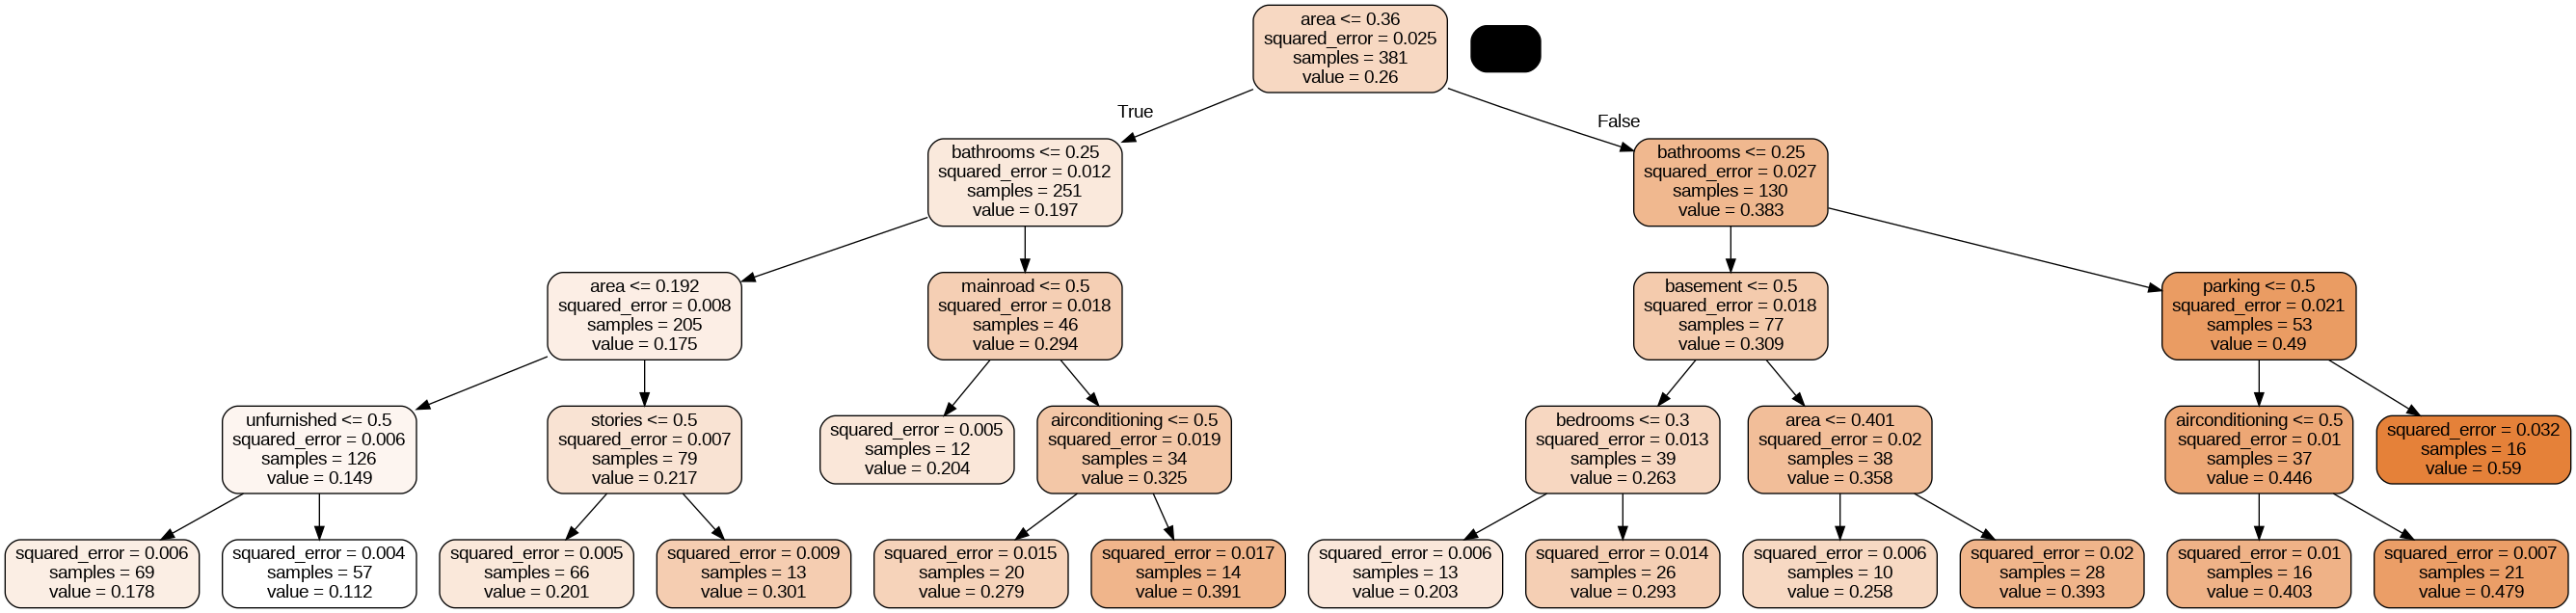

In [220]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [221]:
y_train_pred = dt.predict(X_train)

In [222]:
r2_score(y_train, y_train_pred)

0.6234560022579934

In [223]:
y_test_pred = dt.predict(X_test)

In [224]:
r2_score(y_test, y_test_pred)

0.5289772624972269

# Using Random Forest Regressor

In [225]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [241]:
print(rf.fit(X_train, y_train))

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)


In [242]:
len(rf.estimators_)

100

In [243]:
sample_tree_21 = rf.estimators_[20]  #21st tree for example

In [244]:
sample_tree_21

DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                      random_state=88409749)

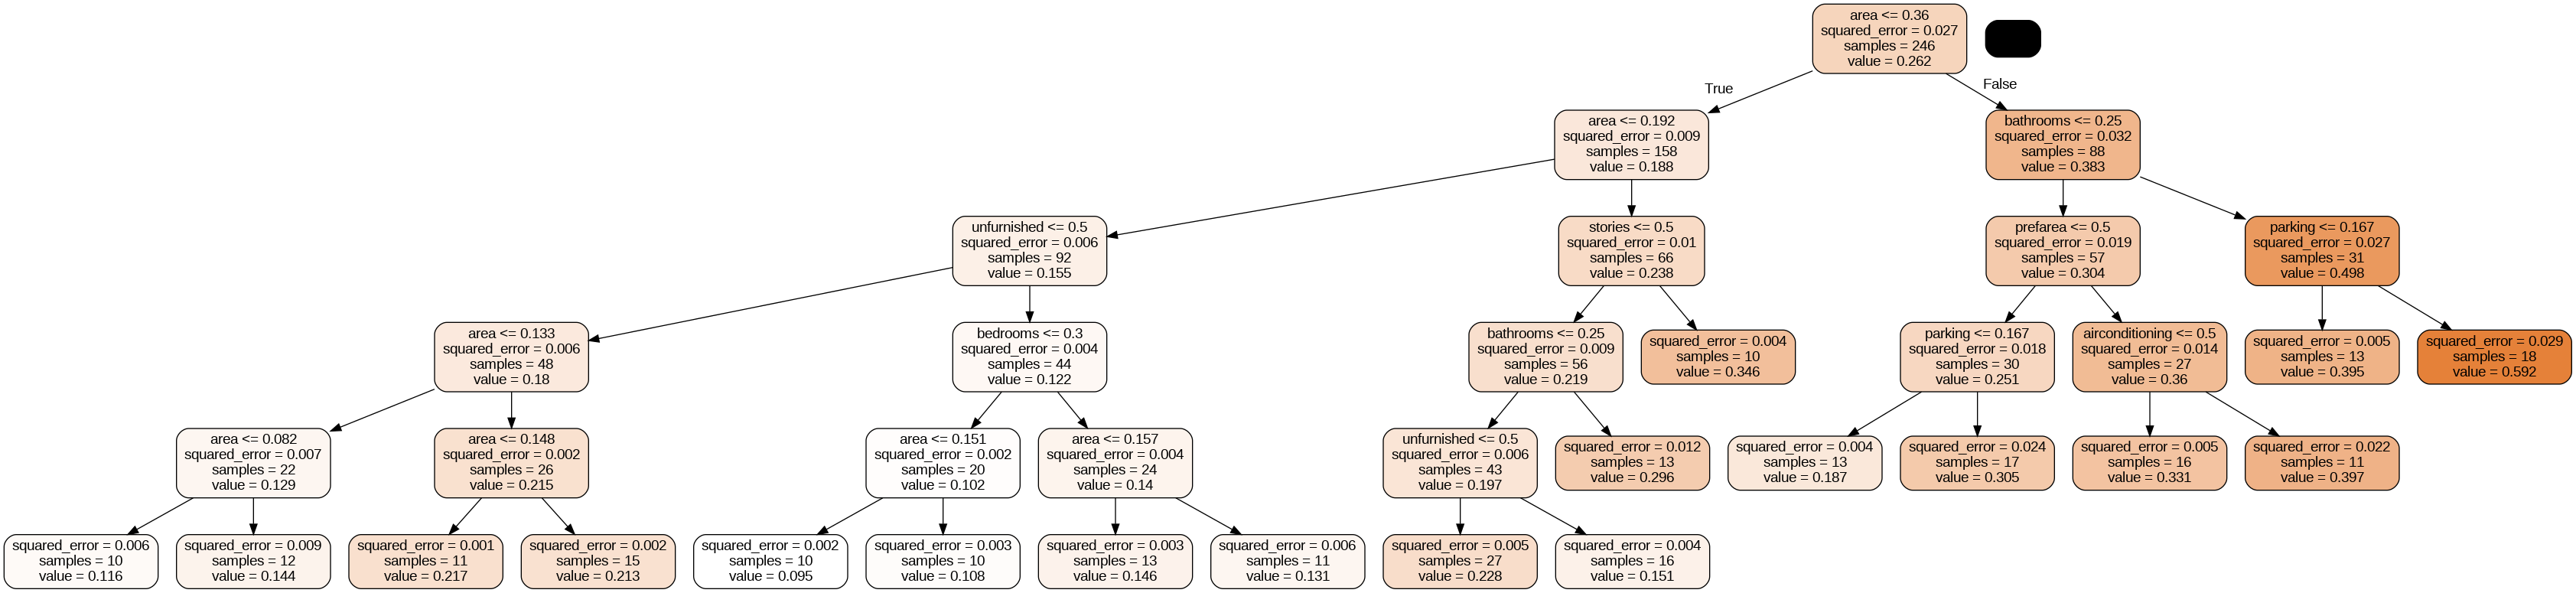

In [245]:
dot_data = StringIO()
export_graphviz(sample_tree_21, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [246]:
sample_tree_76 = rf.estimators_[75]  #76th tree for example

In [247]:
sample_tree_76

DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                      random_state=991681409)

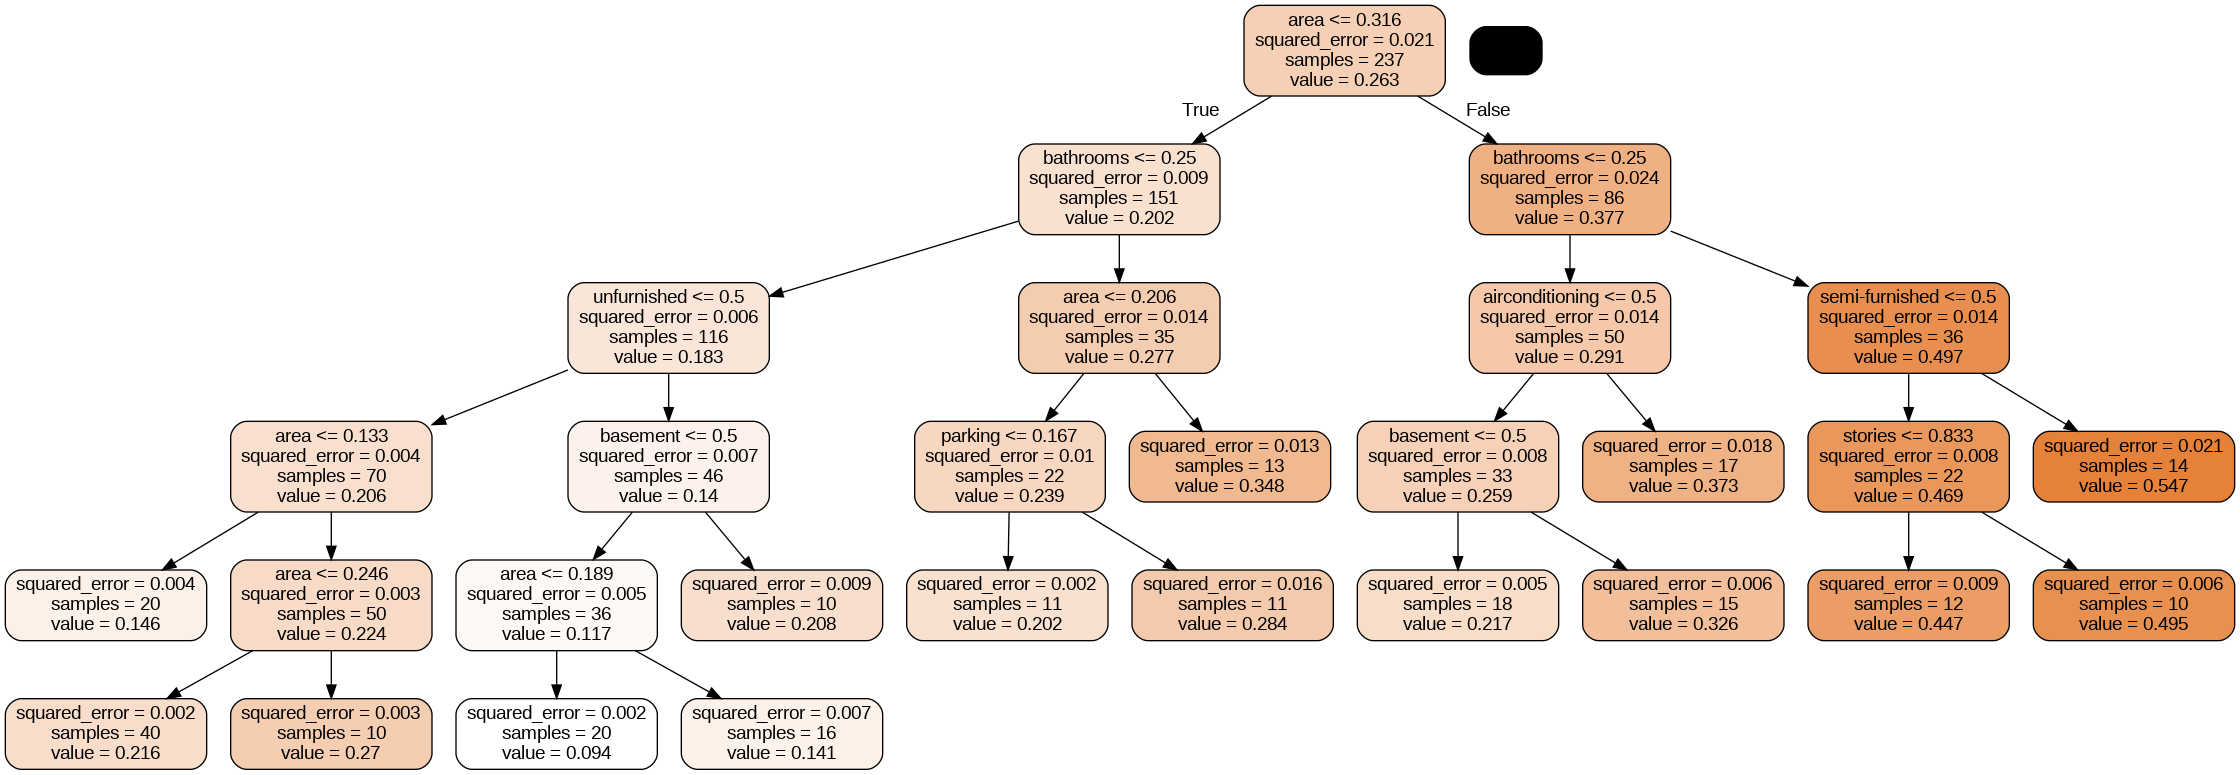

In [248]:
dot_data = StringIO()
export_graphviz(sample_tree_76, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [249]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [250]:
r2_score(y_train, y_train_pred)

0.6781302045288894

In [251]:
r2_score(y_test, y_test_pred)

0.5846197187829346

In [252]:
rf.feature_importances_

array([0.52087594, 0.01381103, 0.26738773, 0.01914681, 0.00587498,
       0.00817021, 0.02371991, 0.        , 0.04360154, 0.03228028,
       0.02345068, 0.00412213, 0.03755875])

In [253]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

In [254]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,area,0.520876
2,bathrooms,0.267388
8,airconditioning,0.043602
12,unfurnished,0.037559
9,parking,0.032280
6,basement,0.023720
10,prefarea,0.023451
3,stories,0.019147
1,bedrooms,0.013811
5,guestroom,0.008170


# Ensembling

Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. Basic idea is to learn a set of classifiers (experts) and to allow them to vote.

- Advantage : Improvement in predictive accuracy.
- Disadvantage : It is difficult to understand an ensemble of classifiers.

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [256]:
m1 = LinearRegression()
m2 = KNeighborsRegressor(5)
m3 = DecisionTreeRegressor(random_state=42, max_depth=4)

In [257]:
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [258]:
y_train_pred = (m1.predict(X_train) + m2.predict(X_train) + m3.predict(X_train))/3
y_test_pred = (m1.predict(X_test) + m2.predict(X_test) + m3.predict(X_test))/3

In [259]:
r2_score(y_train, y_train_pred)

0.7382632088250793

In [260]:
r2_score(y_test, y_test_pred)

0.6523467932580852

In [261]:
r2_score(y_test, m1.predict(X_test))

0.6729582743459919

In [262]:
r2_score(y_test, m2.predict(X_test))

0.6031581989191558

In [263]:
r2_score(y_test, m3.predict(X_test))

0.3538010415829268

### Stacking

In [264]:
from sklearn.ensemble import StackingRegressor

In [265]:
estimators = [
    ('lr', LinearRegression()),
    ("knn",KNeighborsRegressor(5)),
    ('dt',DecisionTreeRegressor(random_state=42, max_depth=4))
]

**Keeping final estimator as Linear Regressor**

In [266]:
stack_reg = StackingRegressor(estimators=estimators,
                              final_estimator=LinearRegression())

In [267]:
stack_reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()),
                              ('dt',
                               DecisionTreeRegressor(max_depth=4,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [268]:
y_train_pred = stack_reg.predict(X_train)
y_test_pred = stack_reg.predict(X_test)

In [269]:
r2_score(y_train, y_train_pred)

0.7107631210168204

In [270]:
r2_score(y_test, y_test_pred)

0.6821700165409168

In [271]:
level2_model = stack_reg.final_estimator_

In [272]:
level2_model.coef_/sum(level2_model.coef_)

array([0.78661634, 0.12005625, 0.09332741])

**Keeping final estimator as KNeighbours Regressor**

In [273]:
stack_reg1 = StackingRegressor(estimators=estimators,
                              final_estimator=KNeighborsRegressor(5))

In [274]:
stack_reg1.fit(X_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()),
                              ('dt',
                               DecisionTreeRegressor(max_depth=4,
                                                     random_state=42))],
                  final_estimator=KNeighborsRegressor())

In [275]:
y_train_pred = stack_reg1.predict(X_train)
y_test_pred = stack_reg1.predict(X_test)

In [276]:
r2_score(y_train,y_train_pred)

0.6839011946157343

In [277]:
r2_score(y_test,y_test_pred)

0.6354813449400734

**Keeping final estimator as Decision Tree regressor**

In [278]:
stack_reg2 = StackingRegressor(estimators=estimators,
                              final_estimator=DecisionTreeRegressor(random_state=42, max_depth=4))

In [279]:
stack_reg2.fit(X_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()),
                              ('dt',
                               DecisionTreeRegressor(max_depth=4,
                                                     random_state=42))],
                  final_estimator=DecisionTreeRegressor(max_depth=4,
                                                        random_state=42))

In [280]:
y_train_pred = stack_reg2.predict(X_train)
y_test_pred = stack_reg2.predict(X_test)

In [281]:
r2_score(y_train,y_train_pred)

0.6679482026889457

In [282]:
r2_score(y_test,y_test_pred)

0.6914915636691941

**Among all, the linear regressor is giving the high accuracy for the test dataset. So it can be considered as the final estimator.**